# Residual CNN Autoencoders

In [ ]:
%matplotlib inline

https://machinelearningmastery.com/how-to-implement-major-architecture-innovations-for-convolutional-neural-networks/

https://www.cv-foundation.org/openaccess/content_cvpr_2016/papers/He_Deep_Residual_Learning_CVPR_2016_paper.pdf

In [1]:
from projectlib.modules import residual_module

In [ ]:
from projectlib.vae import VAE

In [ ]:
from projectlib.viz import view_images

## MNIST

In [ ]:
(X_train, _), (X_test, _) = mnist.load_data()

X_train = np.reshape(X_train.astype('float32') / 255, (X_train.shape[0], 28, 28, 1))
X_test = np.reshape(X_test.astype('float32') / 255, (X_test.shape[0], 28, 28, 1))

print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
from projectlib.vae import get_encoder, get_decoder

In [ ]:
input_shape = X_train[0].shape
latent_dim = 256

encoder = get_encoder(input_shape, latent_dim)
#print(encoder.summary())

decoder = get_decoder(latent_dim)
#print(decoder.summary())

vae = VAE(encoder, decoder)
vae.compile(optimizer=Adam())

vae.fit(X_train, epochs=30, batch_size=32)

Epoch 1/30
1875/1875 [==============================] - 13s 7ms/step - loss: 123.0150 - reconstruction_loss: 121.5426 - kl_loss: 1.4724
Epoch 2/30
1875/1875 [==============================] - 13s 7ms/step - loss: 98.6812 - reconstruction_loss: 97.0053 - kl_loss: 1.6760
Epoch 3/30
1875/1875 [==============================] - 13s 7ms/step - loss: 95.5553 - reconstruction_loss: 93.8342 - kl_loss: 1.7210
Epoch 4/30
1875/1875 [==============================] - 13s 7ms/step - loss: 93.6620 - reconstruction_loss: 91.8984 - kl_loss: 1.7636
Epoch 5/30
1875/1875 [==============================] - 13s 7ms/step - loss: 92.2149 - reconstruction_loss: 90.3959 - kl_loss: 1.8190
Epoch 6/30
1875/1875 [==============================] - 13s 7ms/step - loss: 91.0244 - reconstruction_loss: 89.1750 - kl_loss: 1.8494
Epoch 7/30
1875/1875 [==============================] - 13s 7ms/step - loss: 90.0883 - reconstruction_loss: 88.2223 - kl_loss: 1.8660
Epoch 8/30
1875/1875 [==============================] - 13s 

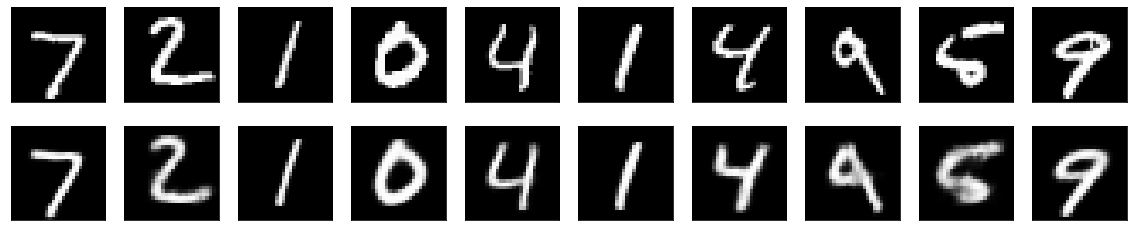

In [ ]:
view_images(X_test[:10], decoder, encoder)

## CIFAR-10

In [ ]:
(X_train, _), (X_test, _) = cifar10.load_data()

X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

print(X_train.shape)
print(X_test.shape)

170500096/170498071 [==============================] - 11s 0us/step
(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [ ]:
def get_encoder(input_shape, latent_dim):
    encoder_inputs = Input(shape=input_shape)
    x = Conv2D(filters=32, kernel_size=3, activation='relu', strides=(2, 2), padding='same')(encoder_inputs)
    x = Conv2D(filters=64, kernel_size=3, activation='relu', strides=(2, 2), padding='same')(x)
    x = Conv2D(filters=128, kernel_size=3, activation='relu', strides=(2, 2), padding='same')(x)
    x = Flatten()(x)
    x = Dense(32, activation='relu')(x)
    x = Dense(16, activation='relu')(x)
    z_mean = Dense(latent_dim)(x)
    z_log_var = Dense(latent_dim)(x)
    z = Sampling()([z_mean, z_log_var])
    encoder = Model(encoder_inputs, [z_mean, z_log_var, z])
    return encoder

def get_decoder(latent_dim):
    latent_inputs = Input(shape=(latent_dim, ))
    x = Dense(8 * 8 * 64, activation='relu')(latent_inputs)
    x = Reshape((8, 8, 64))(x)
    x = Conv2DTranspose(filters=128, kernel_size=3, activation='relu', strides=(2, 2), padding='same')(x)
    x = Conv2DTranspose(filters=64, kernel_size=3, activation='relu', strides=(2, 2), padding='same')(x)
    x = Conv2DTranspose(filters=32, kernel_size=3, activation='relu', strides=(1, 1), padding='same')(x)
    decoded = Conv2DTranspose(filters=3, kernel_size=3, activation='sigmoid', strides=(1, 1), padding='same')(x)
    decoder = Model(latent_inputs, decoded)
    return decoder

In [ ]:
input_shape = X_train[0].shape
latent_dim = 128

encoder = get_encoder(input_shape, latent_dim)
#print(encoder.summary())

decoder = get_decoder(latent_dim)
#print(decoder.summary())

vae = VAE(encoder, decoder)
vae.compile(optimizer=Adam())

vae.fit(X_train, epochs=2, batch_size=32)

Epoch 1/2
1563/1563 [==============================] - 24s 15ms/step - loss: 488.5680 - reconstruction_loss: 487.5083 - kl_loss: 1.0598
Epoch 2/2
1563/1563 [==============================] - 24s 15ms/step - loss: 475.5599 - reconstruction_loss: 474.3468 - kl_loss: 1.2131


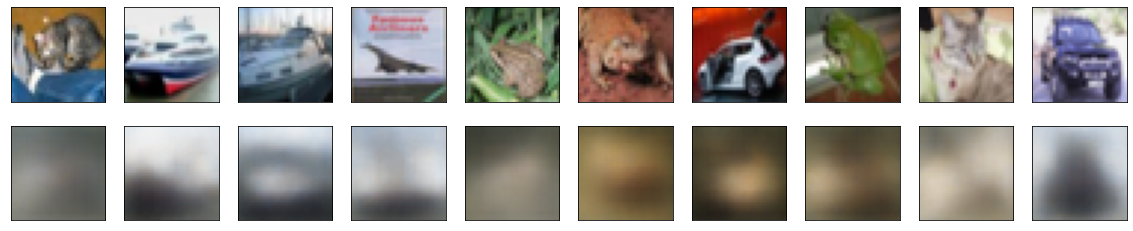

In [ ]:
view_images(X_test[:10], decoder, encoder)

## CIFAR-100

In [ ]:
from tensorflow.keras.datasets import cifar100

In [ ]:
# The data, shuffled and split between train and test sets:
(X_train, _), (X_test, _) = cifar100.load_data()

X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

print(X_train.shape)
print(X_test.shape)

In [ ]:
input_shape = X_train[0].shape
latent_dim = 1024

encoder = get_encoder(input_shape, latent_dim)
#print(encoder.summary())

decoder = get_decoder(latent_dim)
#print(decoder.summary())

vae = VAE(encoder, decoder)
vae.compile(optimizer=Adam())

vae.fit(X_train, epochs=30, batch_size=32)

In [ ]:
view_images(X_test[:10], decoder, encoder)

## Smash from Video

In [ ]:
import cv2
import random
from google.colab import drive
from pathlib import Path
from PIL import Image

In [ ]:
drive.mount('/content/drive')
data_path = 'drive/My Drive/Melee/armada_vs_hbox.mp4'
cap = cv2.VideoCapture(data_path)
n_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
_, frame = cap.read()
print(n_frames)
print(frame.shape)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
19722
(720, 1280, 3)


In [ ]:
def resize(im, desired_size, maintain_aspect_ratio=True, padding_color=(0, 0, 0)):
    # adapted from https://jdhao.github.io/2017/11/06/resize-image-to-square-with-padding/#using-opencv
    old_size = im.shape[:2] # old_size is in (height, width) format

    ratio = float(desired_size)/max(old_size)
    new_size = tuple([int(x*ratio) for x in old_size])

    # new_size should be in (width, height) format

    im = cv2.resize(im, (new_size[1], new_size[0]))

    delta_w = desired_size - new_size[1]
    delta_h = desired_size - new_size[0]
    top, bottom = delta_h//2, delta_h-(delta_h//2)
    left, right = delta_w//2, delta_w-(delta_w//2)

    new_im = cv2.copyMakeBorder(im, top, bottom, left, right, cv2.BORDER_CONSTANT,
        value=padding_color)

    return new_im

In [ ]:
def sample_frames_from_capture(cap, k, technique='random', random_seed=42):
    n_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    k = min(k, n_frames)
    
    if technique == 'first':
        idxs = list(range(k))
    elif technique == 'random':
        random.seed(random_seed)
        idxs = random.sample(range(n_frames), k)
    
    frames = []
    for idx in idxs:
        cap.set(cv2.CAP_PROP_POS_FRAMES, idx)
        _, frame = cap.read()
        frames.append(frame)
        
    return idxs, np.array(frames)

In [ ]:
def get_bboxes(im, window):
    shape = w, h = im.shape[:2]
    bboxes = []
    for x0 in range(0, w, window):
        for y0 in range(0, h, window):
            bboxes.append(((x0, x0+window), (y0, y0+window)))
    return bboxes

def crop(im, x_min, x_max, y_min, y_max):
    return im[x_min:x_max, y_min:y_max]

In [ ]:
idxs, frames = sample_frames_from_capture(cap, 100)

windows = [512, 256]
bboxes = []
for window in windows:
    bboxes.extend(get_bboxes(frames[0], window))

X = []
for frame in frames:
  for bbox in bboxes:
    (x_min, x_max), (y_min, y_max) = bbox
    X.append(resize(crop(frame, x_min, x_max, y_min, y_max), 64) / 255)
X = np.array(X)

from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(X, test_size=0.1, random_state=42)

print(idxs)
print(X_train.shape)

[3648, 819, 9012, 8024, 7314, 4572, 3358, 17870, 2848, 19349, 13825, 1041, 976, 3070, 7164, 7623, 16559, 869, 18390, 6515, 17856, 13746, 7223, 14719, 19309, 9115, 212, 5231, 13848, 11149, 9105, 5094, 7055, 11029, 3349, 3039, 12449, 3169, 11763, 11270, 8667, 1423, 15054, 17571, 4090, 12403, 2582, 18089, 9606, 11850, 18918, 6300, 2279, 1501, 7467, 9482, 2614, 7628, 3309, 12455, 9108, 14857, 11954, 5329, 12130, 11641, 6865, 8748, 2339, 5607, 17502, 8021, 5354, 15147, 12433, 8845, 18250, 7196, 10626, 1832, 7505, 1051, 10336, 13145, 8773, 2168, 6913, 18585, 10311, 6967, 16358, 12964, 15035, 4681, 8679, 4575, 8081, 18394, 17661, 8609]
(1890, 64, 64, 3)


In [ ]:
# define model input
input_img = Input(shape=(64, 64, 3))  # adapt this if using `channels_first` image data format
x = Conv2D(16, (2,2), padding='same', activation='relu', kernel_initializer='he_normal')(input_img)
x = residual_module(x, 32)
x = residual_module(x, 64)
#x = residual_module(x, 128)
encoded = AveragePooling2D((2, 2))(x)
encoder = Model(input_img, encoded)

encoded_inputs = Input(shape=encoded.shape[1:])
x = UpSampling2D((2, 2))(encoded_inputs)
x = residual_transpose_module(x, 128)
x = residual_transpose_module(x, 64)
x = residual_transpose_module(x, 32)
decoded = Conv2DTranspose(3, (2,2), padding='same', activation='relu', kernel_initializer='he_normal')(x)
decoder = Model(encoded_inputs, decoded)

autoencoder = Model(input_img, decoder(encoder(input_img)))
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.001)
autoencoder.compile(optimizer=opt, loss='mean_squared_error')
#autoencoder.summary()

In [ ]:
autoencoder.fit(X_train, X_train, batch_size=32, epochs=10, verbose=2)

Epoch 1/10
228/228 - 7s - loss: 1.1404
Epoch 2/10
228/228 - 7s - loss: 0.1644
Epoch 3/10
228/228 - 7s - loss: 0.1644
Epoch 4/10
228/228 - 7s - loss: 0.1644
Epoch 5/10
228/228 - 7s - loss: 0.1644
Epoch 6/10
228/228 - 7s - loss: 0.1644
Epoch 7/10
228/228 - 7s - loss: 0.1644
Epoch 8/10
228/228 - 7s - loss: 0.1644
Epoch 9/10
228/228 - 7s - loss: 0.1644
Epoch 10/10
228/228 - 7s - loss: 0.1644


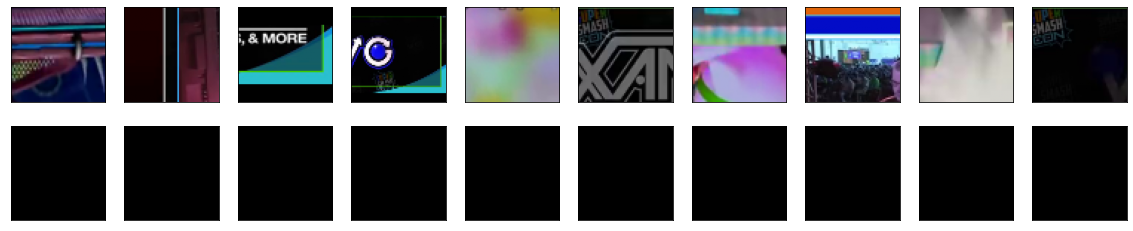

In [ ]:
n = 10
imgs = X_test[:n]
decoded_imgs = autoencoder.predict(imgs)
plt.figure(figsize=(20, 4))
for i, (img, decoded_img) in enumerate(zip(imgs, decoded_imgs)):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(img)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(decoded_img)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
def mser(im):
    cv_image = cv2.cvtColor(im.copy().astype(np.uint8), cv2.COLOR_BGR2RGB)
    vis = cv2.cvtColor(im.copy().astype(np.uint8), cv2.COLOR_BGR2RGB)
    mser = cv2.MSER_create(
        _delta = 200,
        _min_area = 60,
        _max_area = 100000000,
        _max_variation = 0.999,
        _min_diversity = 0.001,
        _max_evolution = 1000,
        _area_threshold = 1.01,
        _min_margin = 0.003,
        _edge_blur_size = 51
    )
    regions, _ = mser.detectRegions(cv_image)
    for p in regions:
        xmax, ymax = np.amax(p, axis=0)
        xmin, ymin = np.amin(p, axis=0)
        vis = cv2.rectangle(vis, (xmin,ymax), (xmax,ymin), (0, 255, 0), 1)
    return cv2.cvtColor(im.copy().astype(np.uint8), cv2.COLOR_BGR2RGB)

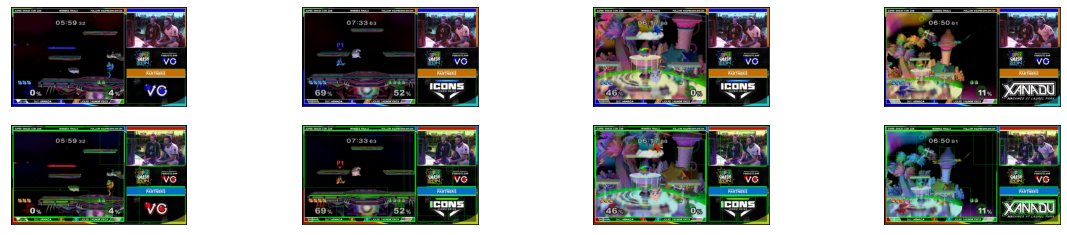

In [ ]:
#decoded_imgs = [mser(im) for im in X_train]


n = 4
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(X_train[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n + 1)
    im2 = cv2.cvtColor((X_train[i]*255).astype(np.uint8), cv2.COLOR_BGR2RGB)
    mser = cv2.MSER_create(
        _delta = 5,
        _min_area = 200,
        _max_area = 100000000,
        _max_variation = 2.,
        _min_diversity = 0.,
        _max_evolution = 200,
        _area_threshold = 1.1,
        _min_margin = 0.003,
        _edge_blur_size = 11
    )
    regions, _ = mser.detectRegions(im2)
    for p in regions:
        xmax, ymax = np.amax(p, axis=0)
        xmin, ymin = np.amin(p, axis=0)
        cv2.rectangle(im2, (xmin,ymax), (xmax,ymin), (0, 255, 0), 1)
      
    plt.imshow(im2)
    cv2.imwrite(f'{i}.png', im2)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Melee Stages

In [3]:
from pathlib import Path
from os import listdir
from PIL import Image
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from google.colab import drive


drive.mount('/content/drive')

data_path = Path('/content/drive/My Drive/Melee/stage snippets')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
def resize(im, desired_size, maintain_aspect_ratio=True, padding_color=(0, 0, 0)):
    # adapted from https://jdhao.github.io/2017/11/06/resize-image-to-square-with-padding/#using-opencv
    old_size = im.shape[:2] # old_size is in (height, width) format

    ratio = float(desired_size)/max(old_size)
    new_size = tuple([int(x*ratio) for x in old_size])

    # new_size should be in (width, height) format

    im = cv2.resize(im, (new_size[1], new_size[0]))

    delta_w = desired_size - new_size[1]
    delta_h = desired_size - new_size[0]
    top, bottom = delta_h//2, delta_h-(delta_h//2)
    left, right = delta_w//2, delta_w-(delta_w//2)

    new_im = cv2.copyMakeBorder(im, top, bottom, left, right, cv2.BORDER_CONSTANT,
        value=padding_color)

    return new_im

def preprocess(im):
    return resize(im, 128)

In [ ]:
def get_stages_data(preprocess=lambda x: x, max_per_dir=10):
    imgs, labels = [], []
    for stage in listdir(data_path):
        folder_path = (data_path / stage).resolve()
        img_paths = [folder_path / img_filename for img_filename in listdir(data_path / folder_path)]
        n_imgs = len(img_paths)

        new_imgs = [np.asarray(Image.open(path)) for path in img_paths[:max_per_dir]]
        n_imgs = len(new_imgs)
        print(stage, n_imgs)
        preprocessed_imgs = list(map(preprocess, new_imgs))
        stage_imgs = np.array(list(map(np.asarray, preprocessed_imgs)))

        imgs.extend(stage_imgs)
        labels.extend([stage]*n_imgs)
    return np.array(imgs), np.array(labels)

def get_ordinal_encoder(labels):
    labels = sorted(set(labels))
    n_unique = len(set(labels))
    encoding = dict(list(zip(labels, list(range(n_unique)))))
    def encoder(label):
        return encoding[label]
    return encoder

In [9]:
X, y = get_stages_data(preprocess)

# encode stage names
ord_encoder = get_ordinal_encoder(y)
y_ord = np.array(list(map(ord_encoder, y)))
y_ohe = to_categorical(y_ord)

FoD_snippets 10
FD_snippets 10
PS_snippets 10
BF_snippets 10


In [10]:
print(X.shape)
print(y.shape)

(40, 128, 128, 3)
(40,)


In [ ]:

# The data, shuffled and split between train and test sets:
(X_train, _), (X_test, _) = train_test_split(X, y, train_size=0.8, shuffle=True, random_state=42)

X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

print(X_train.shape)
print(X_test.shape)

In [ ]:
input_shape = X_train[0].shape
latent_dim = 1024

encoder = get_encoder(input_shape, latent_dim)
#print(encoder.summary())

decoder = get_decoder(latent_dim)
#print(decoder.summary())

vae = VAE(encoder, decoder)
vae.compile(optimizer=Adam())

vae.fit(X_train, epochs=30, batch_size=32)

In [ ]:
view_images(X_test[:10], decoder, encoder)

https://www.learnopencv.com/pytorch-for-beginners-semantic-segmentation-using-torchvision/